In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files


Saving face_det.jpg to face_det (2).jpg
[[181 178 179 ... 103 100  98]
 [180 179 180 ... 105 103 101]
 [179 180 181 ... 108 106 104]
 ...
 [249 242 239 ... 134 133 132]
 [241 244 237 ... 133 132 132]
 [241 244 237 ... 133 132 132]]


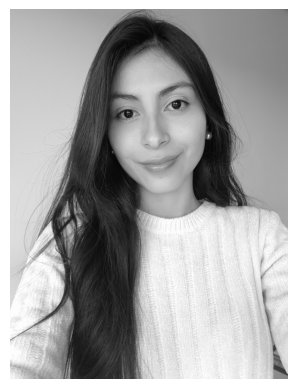

In [5]:
# Step 1: Upload image
uploaded = files.upload()
file_name = next(iter(uploaded))
img_data = np.frombuffer(uploaded[file_name], np.uint8)
gray = cv2.imdecode(img_data, cv2.IMREAD_GRAYSCALE)
print(gray)
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()

In [6]:
# Step 2: Perform bit-plane slicing
bit_planes = []
for i in range(8):
    plane = cv2.bitwise_and(gray, 1 << i)
    bit_planes.append(plane * 255 // (1 << i))  # normalize for visualization

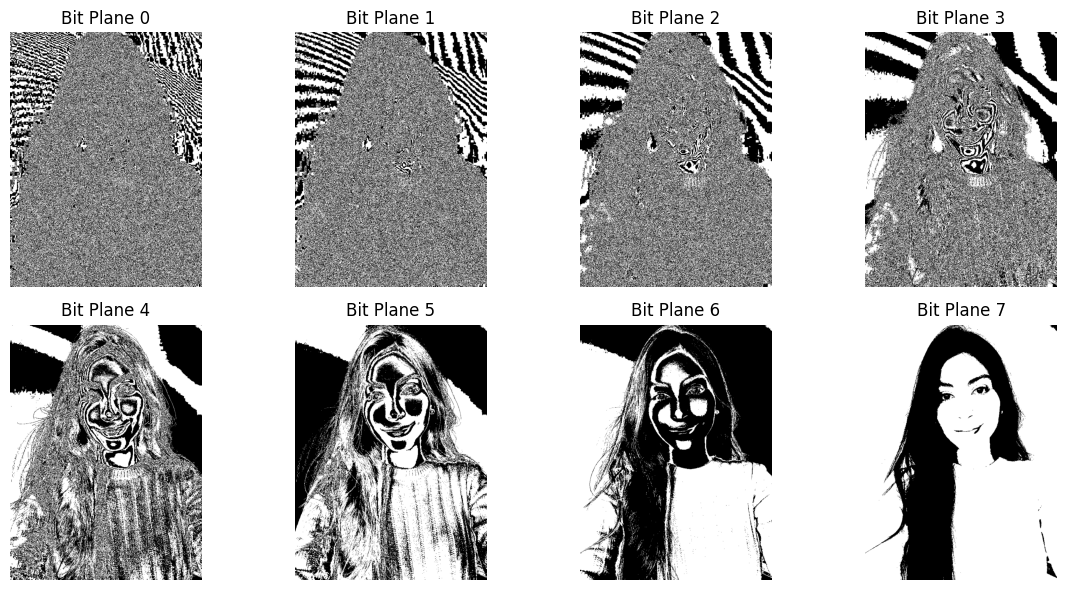

In [7]:
# Step 3: Display all bit-planes
plt.figure(figsize=(12, 6))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(bit_planes[i], cmap='gray')
    plt.title(f"Bit Plane {i}")
    plt.axis('off')

plt.tight_layout()
plt.show()